# Exploratory Data Analysis & Data Cleaning on the DataSet HMEQ
#### by Jonathan Edwin

##### The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics:
###### . BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan
###### . LOAN: Amount of the loan request
###### . MORTDUE: Amount due on existing mortgage
###### . VALUE: Value of current property
###### . REASON: DebtCon = debt consolidation; HomeImp = home improvement
###### . JOB: Occupational categories
###### . YOJ: Years at present job
###### . DEROG: Number of major derogatory reports
###### . DELINQ: Number of delinquent credit lines
###### . CLAGE: Age of oldest credit line in months
###### . NINQ: Number of recent credit inquiries
###### . CLNO: Number of credit lines
###### . DEBTINC: Debt-to-income ratio


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### We tried to import the csv as dataframe using Pandas, but some of the line has problem, so we declared the parameter "error_bad_lines" to skip some of the row

In [2]:
data = pd.read_csv('hmeq_raw.csv', error_bad_lines= False)

b'Skipping line 20: expected 13 fields, saw 14\nSkipping line 3740: expected 13 fields, saw 14\nSkipping line 5467: expected 13 fields, saw 17\nSkipping line 5624: expected 13 fields, saw 15\n'


In [3]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


###### Mencari Info data awal ini dari 5958 entries, hanya 2 dari 13 columns yang tidak memiliki missing value(Column BAD dan LOAN)
###### Disini kita juga menemukan bahwa  BAD dan LOAN adalah angka bulat(int), REASON dan JOB adalah String(object), dan sisanya adalah float

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 13 columns):
BAD        5958 non-null int64
LOAN       5958 non-null int64
MORTDUE    5440 non-null float64
VALUE      5846 non-null float64
REASON     5706 non-null object
JOB        5679 non-null object
YOJ        5444 non-null float64
DEROG      5250 non-null float64
DELINQ     5378 non-null float64
CLAGE      5650 non-null float64
NINQ       5448 non-null float64
CLNO       5736 non-null float64
DEBTINC    4691 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.2+ KB


##### Melakukan jumlah untuk setiap column memiliki berapa jumlah Missing Value

In [7]:
nama_col = data.columns
for i in nama_col:
    print(i + " - " +str(data[i].isnull().sum()))

BAD - 0
LOAN - 0
MORTDUE - 518
VALUE - 112
REASON - 252
JOB - 279
YOJ - 514
DEROG - 708
DELINQ - 580
CLAGE - 308
NINQ - 510
CLNO - 222
DEBTINC - 1267


### Jika kita coba lakukan drop row yang memiliki missing value, akan menghasilnya hanya 3363 data. Artinya kehilangan 2595 row atau sekitar 43% data. 
## Oleh karena itu, TIDAK DISARANKAN untuk langsung drop row yang memiliki missing value

In [8]:
data_dropna = data.dropna()

In [9]:
data_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 5 to 5957
Data columns (total 13 columns):
BAD        3363 non-null int64
LOAN       3363 non-null int64
MORTDUE    3363 non-null float64
VALUE      3363 non-null float64
REASON     3363 non-null object
JOB        3363 non-null object
YOJ        3363 non-null float64
DEROG      3363 non-null float64
DELINQ     3363 non-null float64
CLAGE      3363 non-null float64
NINQ       3363 non-null float64
CLNO       3363 non-null float64
DEBTINC    3363 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.8+ KB


#### Data Describe akan menunjukkan statistik dasar mengenai data numeric tersebut tiap kolomnya. Dari sini kita bisa mendapat beberapa Insight seperti:

###### - Pada Column BAD yang seharusnya terisi oleh nilai 0 atau 1 , tapi memiliki MAX bernilai 10
###### - Terdapat nilai negatif di min untuk column VALUE dan DEBTINC
###### - Mean dan std di column VALUE berbeda jauh, terdapat outlier yang mempengaruhi mean
###### - Column DEROG dan DELINQ 75% datanya masih 0.00 sehingga terdapat outlier mendekati max

#### Menunggukan nunique membuat kita mengetahui ada berapa jumlah distinct value tiap column

In [10]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958.000000,5.958000e+03,5440.000000,5.846000e+03,5444.000000,5250.000000,5378.000000,5650.000000,5448.000000,5736.000000,4691.000000
mean,0.201242,1.972367e+04,73744.567132,2.581446e+05,8.918488,0.254667,0.449610,179.803255,1.186123,21.293410,35.188839
std,0.420578,8.600137e+04,44421.670153,1.177309e+07,7.569479,0.846193,1.127442,85.816165,1.728776,10.138115,73.627551
min,0.000000,1.100000e+03,2063.000000,-2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.719596
25%,0.000000,1.110000e+04,46309.000000,6.608575e+04,3.000000,0.000000,0.000000,115.131877,0.000000,14.750000,29.136864
50%,0.000000,1.635000e+04,65019.000000,8.924500e+04,7.000000,0.000000,0.000000,173.480399,1.000000,20.000000,34.816960
75%,0.000000,2.330000e+04,91421.250000,1.198078e+05,13.000000,0.000000,0.000000,231.604045,2.000000,26.000000,39.008591
max,10.000000,6.600000e+06,399550.000000,9.001400e+08,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,4537.512708


In [13]:
data.nunique()

BAD           4
LOAN        541
MORTDUE    5049
VALUE      5381
REASON        3
JOB           7
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5310
NINQ         16
CLNO         62
DEBTINC    4690
dtype: int64

##### Mengecek Column BAD, terdapat angka 3 dan 10 sebagai data invalid, sehingga perlu dihapus

In [14]:
data['BAD'].value_counts()

0     4770
1     1186
3        1
10       1
Name: BAD, dtype: int64

##### Mencari index ke berapa untuk data tersebut

In [15]:
data[data['BAD']==3]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
469,3,7000,73873.0,111781.0,DebtCon,Office,0.0,0.0,0.0,231.799913,0.0,38.0,19.273579


In [16]:
data[data['BAD']==10]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
574,10,7500,63500.0,86125.0,HomeImp,Other,5.0,0.0,0.0,136.1,0.0,8.0,NaN


##### Menghapus data di row index 469 dan 574 . Melakukan pengecekan ulang apakah sudah terhapus

In [17]:
data.drop(data.index[[469,574]], inplace= True)

In [18]:
data['BAD'].value_counts()

0    4770
1    1186
Name: BAD, dtype: int64

##### Melakukan Pengecekan untuk column REASON dan ditemukan 1 dataset yang typo 

In [19]:
data['REASON'].value_counts()

DebtCon     3925
HomeImp     1778
DebtCons       1
Name: REASON, dtype: int64

In [20]:
data['REASON'] =data['REASON'].replace('DebtCons', 'DebtCon')

In [21]:
data['REASON'].value_counts()

DebtCon    3926
HomeImp    1778
Name: REASON, dtype: int64

##### Melakukan Pengecekan untuk column JOB dan ditemukan 1 dataset yang typo 

In [22]:
data['JOB'].value_counts()

Other      2384
ProfExe    1276
Office      947
Mgr         767
Self        193
Sales       109
Othe          1
Name: JOB, dtype: int64

In [23]:
data['JOB'] =data['JOB'].replace('Othe', 'Other')

In [24]:
data['JOB'].value_counts()

Other      2385
ProfExe    1276
Office      947
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

##### Periksa Column VALUE dan menemukn 1 angka negatif dan 2 angka yang sangat besar(outlier) 

In [25]:
data['VALUE'].value_counts().sort_index().head()

-25000.0    1
 8000.0     1
 8800.0     1
 9100.0     1
 9500.0     1
Name: VALUE, dtype: int64

In [26]:
data['VALUE'].value_counts().sort_index().tail(5)

854112.0       1
854114.0       1
855909.0       1
14440150.0     1
900140000.0    1
Name: VALUE, dtype: int64

In [27]:
data['VALUE'].value_counts().sort_index().tail(5)

854112.0       1
854114.0       1
855909.0       1
14440150.0     1
900140000.0    1
Name: VALUE, dtype: int64

In [28]:
data[data['VALUE']==900140000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4019,0,21000,87000.0,900140000.0,DebtCon,ProfExe,22.0,1.0,0.0,163.366667,1.0,25.0,NaN


##### Saat ini hanya menghandle invalid data, yaitu dihapus. Karena tidak ada suatu value yang bernilai negatif 

In [29]:
data[data['VALUE']==-25000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
497,1,7000,18000.0,-25000.0,DebtCon,Other,6.5,1.0,0.0,205.966667,1.0,19.0,NaN


In [30]:
data.drop(data.index[[497]], inplace= True)

In [31]:
data[data['VALUE']==900140000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4019,0,21000,87000.0,900140000.0,DebtCon,ProfExe,22.0,1.0,0.0,163.366667,1.0,25.0,NaN


##### Periksa Column DEBTINC dan menemukn 1 angka negatif dan 2 angka yang sangat besar(outlier). Namun karena di kondisi DEBTINC memungkinkan negatif, artinya hanya sebagai outlier(karena kejadian hingga negatif itu kejadian sangat langkah)

In [32]:
data['DEBTINC'].value_counts().sort_index().head()

-21.719596    1
 0.000000     1
 0.524499     1
 0.720295     1
 0.838118     1
Name: DEBTINC, dtype: int64

In [33]:
data['DEBTINC'].value_counts().sort_index().tail()

143.949605     1
144.189001     1
203.312149     1
2224.478881    1
4537.512708    1
Name: DEBTINC, dtype: int64

In [34]:
data[data['DEBTINC']< 0]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
371,0,6300,58052.0,70091.0,DebtCon,ProfExe,9.0,0.0,4.0,153.780439,1.0,30.0,-21.719596


In [35]:
data[data['DEBTINC']>205]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
74,1,3900,29896.0,45960.0,HomeImp,Other,11.0,0.0,0.0,146.123242,0.0,14.0,2224.478881
187,0,5000,80153.0,97275.0,DebtCon,Other,1.0,0.0,0.0,120.675063,2.0,10.0,4537.512708


##### Periksa Column DEROG 

In [36]:
data['DEROG'].value_counts().sort_index()

0.0     4523
1.0      435
2.0      159
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

##### Periksa column NINQ 

In [37]:
data['NINQ'].value_counts().sort_index()

0.0     2527
1.0     1338
2.0      781
3.0      391
4.0      156
5.0       75
6.0       56
7.0       44
8.0       22
9.0       11
10.0      28
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

##### Periksa Column CLAGE dan menemukan 2 outliers 

In [38]:
data['CLAGE'].value_counts().sort_index().head()

0.000000    2
0.486711    1
0.507115    1
2.033333    1
2.820786    1
Name: CLAGE, dtype: int64

In [39]:
data['CLAGE'].value_counts().sort_index().tail()

639.058172     1
648.328493     1
649.747104     1
1154.633333    1
1168.233561    1
Name: CLAGE, dtype: int64

In [40]:
data[data['CLAGE']>650]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3096,1,16800,87300.0,155500.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,NaN
3678,1,19300,96454.0,157809.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138


##### Periksa column MORTDUE 

In [41]:
data['MORTDUE'].value_counts().sort_index().head()

2063.0    1
2619.0    1
2800.0    1
3372.0    1
4000.0    1
Name: MORTDUE, dtype: int64

In [42]:
data['MORTDUE'].value_counts().sort_index().tail(20)

241570.0    1
241931.0    1
242111.0    1
247500.0    1
256431.0    1
290000.0    1
331000.0    1
362000.0    1
362578.0    1
362909.0    1
363737.0    1
365528.0    1
367089.0    1
367917.0    1
369874.0    1
371003.0    1
391000.0    1
397299.0    1
399412.0    1
399550.0    1
Name: MORTDUE, dtype: int64

##### Periksa Column LOAN dan ditemukan 1 angka yang sangat besar(outlier)

In [43]:
data['LOAN'].value_counts().sort_index().head()

1100    1
1300    1
1500    2
1700    2
1800    2
Name: LOAN, dtype: int64

In [44]:
data['LOAN'].value_counts().sort_index().tail()

89000      1
89200      1
89800      1
89900      1
6600000    1
Name: LOAN, dtype: int64

In [45]:
data[data['LOAN']==6600000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
419,0,6600000,40926.0,50486.0,HomeImp,Office,10.0,NaN,NaN,179.800868,NaN,19.0,27.532376


### VISUAL EDA Categorical

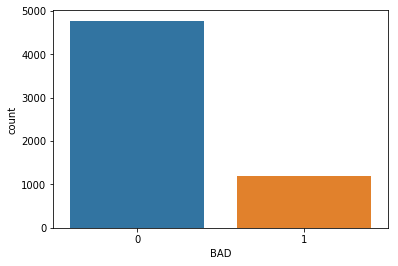

In [46]:
sns.countplot(x='BAD', data = data)

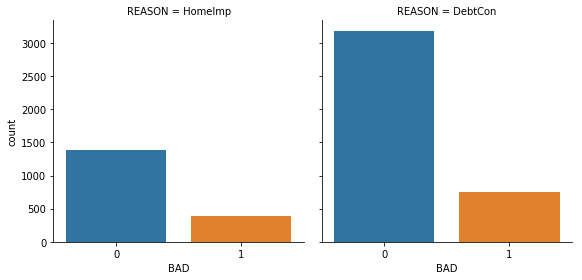

In [47]:
sns.factorplot(x='BAD', col = 'REASON',kind='count', data=data)

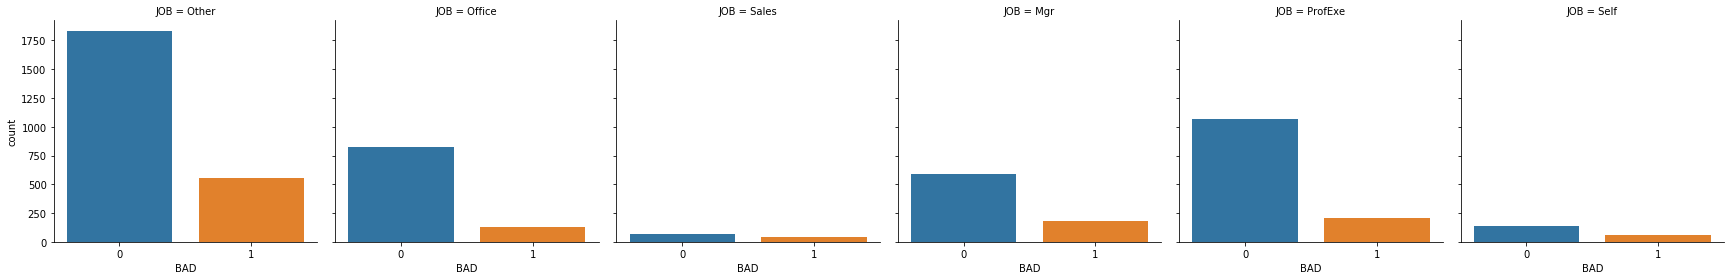

In [48]:
sns.factorplot(x='BAD', col = 'JOB',kind='count', data=data)

### VISUAL EDA Numerical

##### As we can see from this 3 plots, we found an extreme outlier

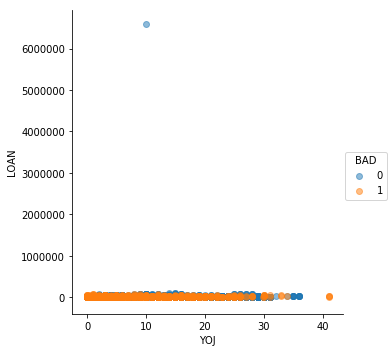

In [49]:
sns.lmplot(x='YOJ', y='LOAN', hue='BAD', data=data, fit_reg=False, scatter_kws={'alpha':0.5});


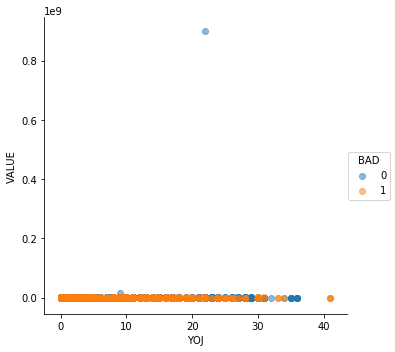

In [50]:
sns.lmplot(x='YOJ', y='VALUE', hue='BAD', data=data, fit_reg=False, scatter_kws={'alpha':0.5});

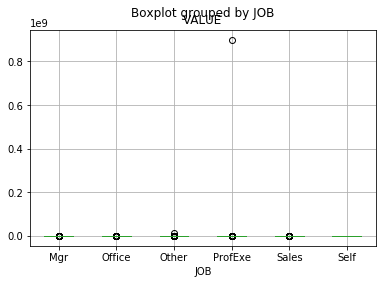

In [51]:
data.boxplot(column='VALUE', by ='JOB')

#### Membuang outlier

###### Outlier yang dimaksud adalah suatu data yang terlalu extreme sehingga saat divisualisasi seperti yang terjadi di atas. BUKAN outlier yang seperti perhitungan untuk boxplot

In [52]:
data.drop(data.index[[4019, 371, 74,187, 3096, 3678,419]], inplace= True)

In [53]:
data = data[data.VALUE >0]

In [58]:
data = data[data.VALUE < 900000]

##### Mencoba melakukan Visualisai EDA Numerical setelah outliers dihapus

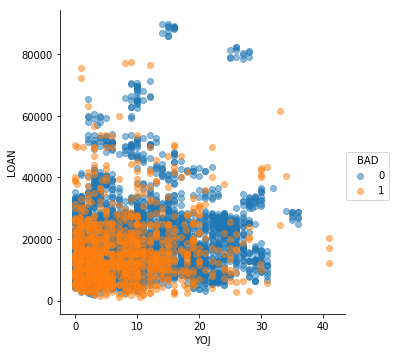

In [59]:
sns.lmplot(x='YOJ', y='LOAN', hue='BAD', data=data, fit_reg=False, scatter_kws={'alpha':0.5});


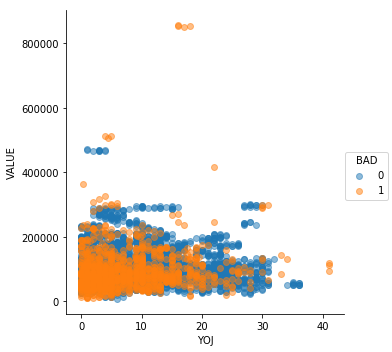

In [60]:
sns.lmplot(x='YOJ', y='VALUE', hue='BAD', data=data, fit_reg=False, scatter_kws={'alpha':0.5});

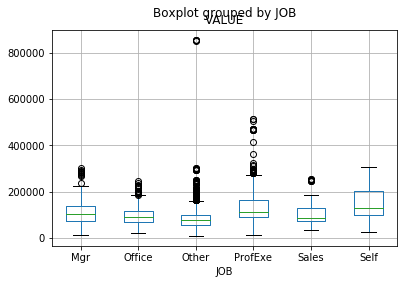

In [61]:
data.boxplot(column='VALUE', by ='JOB')

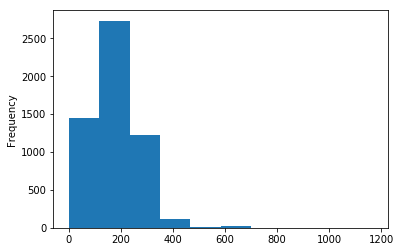

In [62]:
data.CLAGE.plot(kind='hist')

##### Membuat Column baru untuk mengetahui setiap row memiliki berapa missing value 

In [63]:
data['Mis_Col'] = data.isnull().sum(axis=1)

In [64]:
data['Mis_Col'].value_counts()

0     3358
1     1571
2      391
3      203
5       79
6       64
4       59
9       46
8       35
7       22
10       5
Name: Mis_Col, dtype: int64

##### Ada 108 row yang memiliki >= 7 columns berisi missing value 

In [66]:
data[data['Mis_Col']>=7].shape

(108, 14)

In [67]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Mis_Col
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,1
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,1
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0


##### Hanya mengambil row yang memiliki missing value kurang dari 7 columns 

In [68]:
data = data[data['Mis_Col']<7]

In [69]:
data['Mis_Col'].value_counts()

0    3358
1    1571
2     391
3     203
5      79
6      64
4      59
Name: Mis_Col, dtype: int64

In [70]:
data.drop('Mis_Col', axis=1, inplace = True)

In [71]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


## How to Handle Missing Value:

### Categorical or Discrete Data:
##### 1. Ignore the row that has missing value, or it's possible to ignore the column if there are more than 50% nan value in the column
##### 2. Treat missing data as another category
##### 3. Replace by most frequent value
##### 4. Develop model to predict missing value

### Numerical Data or Continuous:
##### 1. Ignore the row that has missing value, or it's possible to ignore the column if there are more than 50% nan value in the column
##### 2. Replace with mean of column or median of column(if there are many outliers)
##### 3. Replace with certain value such as -9999(In this case we still try to treat them as missing value)
##### 4. Build model to predict missing value

In [72]:
nama_col = data.columns
for i in nama_col:
    print(i + " - " +str(data[i].isnull().sum()))

BAD - 0
LOAN - 0
MORTDUE - 426
VALUE - 0
REASON - 157
JOB - 167
YOJ - 405
DEROG - 570
DELINQ - 445
CLAGE - 180
NINQ - 381
CLNO - 95
DEBTINC - 1151


### Isi missing value untuk column bagian Categoircal yang berupa string (REASON dan JOB)

In [73]:
data['REASON'].value_counts()

DebtCon    3847
HomeImp    1721
Name: REASON, dtype: int64

In [74]:
data['JOB'].value_counts()

Other      2330
ProfExe    1256
Office      929
Mgr         748
Self        188
Sales       107
Name: JOB, dtype: int64

##### Untuk REASON, karena dari data dikasih tau bahwa hanya 2 pilihan artinya untuk mengisi missing value menggunakan modus  

In [75]:
data['REASON'] =data['REASON'].replace(np.nan, 'DebtCon')

In [76]:
data['REASON'].value_counts()

DebtCon    4004
HomeImp    1721
Name: REASON, dtype: int64

###### Untuk JOB sebenarnya ingin membuat categorical baru berupa "other", namun kebetulan udah ada jadi missing value dijadikan "other"

In [77]:
data['JOB'] =data['JOB'].replace(np.nan, 'Other')

In [78]:
data['JOB'].value_counts()

Other      2497
ProfExe    1256
Office      929
Mgr         748
Self        188
Sales       107
Name: JOB, dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5725 entries, 0 to 5957
Data columns (total 13 columns):
BAD        5725 non-null int64
LOAN       5725 non-null int64
MORTDUE    5299 non-null float64
VALUE      5725 non-null float64
REASON     5725 non-null object
JOB        5725 non-null object
YOJ        5320 non-null float64
DEROG      5155 non-null float64
DELINQ     5280 non-null float64
CLAGE      5545 non-null float64
NINQ       5344 non-null float64
CLNO       5630 non-null float64
DEBTINC    4574 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 626.2+ KB


In [80]:
nama_col = data.columns
for i in nama_col:
    print(i + " - " +str(data[i].isnull().sum()))

BAD - 0
LOAN - 0
MORTDUE - 426
VALUE - 0
REASON - 0
JOB - 0
YOJ - 405
DEROG - 570
DELINQ - 445
CLAGE - 180
NINQ - 381
CLNO - 95
DEBTINC - 1151


In [81]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5725.000000,5725.000000,5299.000000,5725.000000,5320.000000,5155.000000,5280.000000,5545.000000,5344.000000,5630.000000,4574.000000
mean,0.184978,18720.943231,73868.341423,102109.880793,8.910620,0.240543,0.423485,180.114809,1.184693,21.294139,33.909004
std,0.388314,11272.533601,44264.905444,57599.866871,7.559297,0.815989,1.078215,86.072346,1.726407,10.112486,8.529834
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11200.000000,46565.000000,66226.000000,3.000000,0.000000,0.000000,115.076186,0.000000,15.000000,29.269134
50%,0.000000,16400.000000,65021.000000,89634.000000,7.000000,0.000000,0.000000,173.690461,1.000000,20.000000,34.888239
75%,0.000000,23400.000000,91485.000000,119780.000000,13.000000,0.000000,0.000000,232.315545,2.000000,26.000000,39.081422
max,1.000000,89900.000000,399412.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,65.000000,203.312149


### Isi missing value untuk column bagian Numerical  

#### Isi Missing Value untuk column bagian Numerical Discrete(DEROG , DELINQ) 
###### Disini akan menggunakan MEDIAN dari setiap column  karena data tersebut tidak continue, jika kita gunakan mean juga akan menghasilkan angka decimal

In [82]:
data['DEROG'].value_counts()

0.0     4473
1.0      414
2.0      147
3.0       57
4.0       21
5.0       15
6.0       12
8.0        6
7.0        5
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [83]:
data['DELINQ'].value_counts()

0.0     4140
1.0      637
2.0      231
3.0      125
4.0       69
5.0       34
6.0       23
7.0       12
8.0        3
11.0       2
10.0       2
13.0       1
15.0       1
Name: DELINQ, dtype: int64

In [84]:
print(data['DEROG'].median())

0.0


In [85]:
print(data['DELINQ'].median())

0.0


In [86]:
data['DEROG'].fillna(data['DEROG'].median(), inplace = True)

In [87]:
data['DELINQ'].fillna(data['DELINQ'].median(), inplace = True)

In [88]:
data['DEROG'].value_counts()

0.0     5043
1.0      414
2.0      147
3.0       57
4.0       21
5.0       15
6.0       12
8.0        6
7.0        5
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [89]:
print(data['DELINQ'].value_counts())

0.0     4585
1.0      637
2.0      231
3.0      125
4.0       69
5.0       34
6.0       23
7.0       12
8.0        3
11.0       2
10.0       2
13.0       1
15.0       1
Name: DELINQ, dtype: int64


In [90]:
data['NINQ'].fillna(data['NINQ'].median(), inplace = True)

In [91]:
data['CLNO'].fillna(data['CLNO'].median(), inplace = True)

#### Isi Missing Value untuk column bagian Numerical Continiuous
###### Disini akan menggunakan MEAN atau MEDIAN dari setiap column

###### Kalau antara median dan mean tidak beda jauh disarankan menggunakan mean, namun jika median dan mean jauh karena ada outlier, gunakan median

In [92]:
data['YOJ'].value_counts().head(10)

0.0     407
1.0     353
2.0     341
5.0     327
4.0     317
6.0     317
3.0     299
10.0    283
9.0     279
8.0     248
Name: YOJ, dtype: int64

In [93]:
data['YOJ'].mean()

8.910620300751885

In [94]:
data['YOJ'].fillna(data['YOJ'].mean(), inplace = True)

In [95]:
print(data['YOJ'].value_counts().head(10))

0.00000     407
8.91062     405
1.00000     353
2.00000     341
5.00000     327
6.00000     317
4.00000     317
3.00000     299
10.00000    283
9.00000     279
Name: YOJ, dtype: int64


In [96]:
data['MORTDUE'].value_counts().head()

42000.0    11
47000.0    10
65000.0     7
55000.0     7
62000.0     7
Name: MORTDUE, dtype: int64

In [97]:
data['MORTDUE'].median()

65021.0

In [98]:
data['MORTDUE'].fillna(data['MORTDUE'].median(), inplace = True)

In [99]:
data['DEBTINC'].fillna(data['DEBTINC'].mean(), inplace = True)

In [100]:
data['CLAGE'].fillna(data['CLAGE'].mean(), inplace = True)

### Dengan ini, sudah mengisi seluruh missing value

In [101]:
nama_col = data.columns
for i in nama_col:
    print(i + " - " +str(data[i].isnull().sum()))

BAD - 0
LOAN - 0
MORTDUE - 0
VALUE - 0
REASON - 0
JOB - 0
YOJ - 0
DEROG - 0
DELINQ - 0
CLAGE - 0
NINQ - 0
CLNO - 0
DEBTINC - 0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5725 entries, 0 to 5957
Data columns (total 13 columns):
BAD        5725 non-null int64
LOAN       5725 non-null int64
MORTDUE    5725 non-null float64
VALUE      5725 non-null float64
REASON     5725 non-null object
JOB        5725 non-null object
YOJ        5725 non-null float64
DEROG      5725 non-null float64
DELINQ     5725 non-null float64
CLAGE      5725 non-null float64
NINQ       5725 non-null float64
CLNO       5725 non-null float64
DEBTINC    5725 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 626.2+ KB


In [103]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000
mean,0.184978,18720.943231,73210.006498,102109.880793,8.910620,0.216594,0.390568,180.114809,1.172402,21.272664,33.909004
std,0.388314,11272.533601,42649.148742,57599.866871,7.286963,0.777638,1.041646,84.708197,1.668596,10.029580,7.624149
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11200.000000,48100.000000,66226.000000,3.000000,0.000000,0.000000,116.632733,0.000000,15.000000,30.708487
50%,0.000000,16400.000000,65021.000000,89634.000000,8.000000,0.000000,0.000000,176.533333,1.000000,20.000000,33.909004
75%,0.000000,23400.000000,88898.000000,119780.000000,12.000000,0.000000,0.000000,229.474919,2.000000,26.000000,38.078963
max,1.000000,89900.000000,399412.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,65.000000,203.312149


### Mengubah column String menjadi angka dengan melakukan One Hot Encoding atau Ordinal Encoding 

###### Ordinal Encoding adalah membuat data dalam bentuk string  menjadi angka, biasanya menggunakan lexicographic order, tetapi bisa juga random

###### Untuk value di job akan menggunakan urutan lexicographic 

In [104]:
data['JOB'].value_counts()

Other      2497
ProfExe    1256
Office      929
Mgr         748
Self        188
Sales       107
Name: JOB, dtype: int64

In [105]:
mapper = {'Mgr': 1, 'Office': 2, 'Other':3, 'ProfExe':4, 'Sales':5, 'Self': 6}

In [106]:
data['JOB'].replace(mapper, inplace = True)

In [107]:
data['JOB'].value_counts()

3    2497
4    1256
2     929
1     748
6     188
5     107
Name: JOB, dtype: int64

###### Ont Hot Encoding artinya membuat column baru dengan menggunakan distinct value dari categorical data. Seperti column REASON yang memiliki 2 distinct value yaitu 'DebtCon' dan 'HomeImp', artinya kita membuat 2 column baru.

###### Saat ini ada 2 cara membuat One Hot Encoding , yaitu pd.get_dummies atau sklearn OneHot Encoder . Disini akan dibuat menggunakan pd.get_dummies

In [108]:
data['REASON'].value_counts()

DebtCon    4004
HomeImp    1721
Name: REASON, dtype: int64

In [109]:
data_REASON_dummies = pd.get_dummies(data['REASON'], prefix = 'REASON')

In [110]:
data_REASON_dummies.head()

,REASON_DebtCon,REASON_HomeImp
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


###### Agar mudah mengerti One Hot Encoding sebenarnya apa yang terjadi 

In [111]:
data_REASON_dummies2 = data_REASON_dummies.copy()

In [112]:
data_REASON_dummies2['REASON'] = data['REASON']

In [113]:
data_REASON_dummies2.head(2)

,REASON_DebtCon,REASON_HomeImp,REASON
0,0,1,HomeImp
1,0,1,HomeImp


In [114]:
data_REASON_dummies2.tail(2)

,REASON_DebtCon,REASON_HomeImp,REASON
5956,1,0,DebtCon
5957,1,0,DebtCon


In [115]:
data_REASON_dummies['REASON_DebtCon'].value_counts()

1    4004
0    1721
Name: REASON_DebtCon, dtype: int64

In [116]:
data_REASON_dummies['REASON_HomeImp'].value_counts()

0    4004
1    1721
Name: REASON_HomeImp, dtype: int64

##### Seperti yang dilihat 2 column tersebut sebenarnya sama , oleh karena itu One Hot Encoding  BEST PRACTICE membuat column sebanyak (n-1) dimana n adalah jumlah distinct value

##### Untuk kejadian ini , akan digunakan REASON_DebtCon 

In [117]:
data['REASON_DebtCon'] = data_REASON_dummies['REASON_DebtCon']

In [118]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon
0,1,1100,25860.0,39025.0,HomeImp,3,10.5,0.0,0.0,94.366667,1.0,9.0,33.909004,0
1,1,1300,70053.0,68400.0,HomeImp,3,7.0,0.0,2.0,121.833333,0.0,14.0,33.909004,0
2,1,1500,13500.0,16700.0,HomeImp,3,4.0,0.0,0.0,149.466667,1.0,10.0,33.909004,0
4,0,1700,97800.0,112000.0,HomeImp,2,3.0,0.0,0.0,93.333333,0.0,14.0,33.909004,0
5,1,1700,30548.0,40320.0,HomeImp,3,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0


##### DROP Column REASON karena sudah kita masukkan Column REASON_DebtCon 

In [119]:
data.drop('REASON', axis=1, inplace = True)

In [120]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon
0,1,1100,25860.0,39025.0,3,10.5,0.0,0.0,94.366667,1.0,9.0,33.909004,0
1,1,1300,70053.0,68400.0,3,7.0,0.0,2.0,121.833333,0.0,14.0,33.909004,0
2,1,1500,13500.0,16700.0,3,4.0,0.0,0.0,149.466667,1.0,10.0,33.909004,0
4,0,1700,97800.0,112000.0,2,3.0,0.0,0.0,93.333333,0.0,14.0,33.909004,0
5,1,1700,30548.0,40320.0,3,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0


### Melakukan korelasi antar setiap column, untuk visualisasi dapat menggunakan heatmap 

In [121]:
data.corr()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon
BAD,1.000000,-0.084619,-0.048897,-0.028695,0.026078,-0.064174,0.263024,0.337493,-0.166522,0.178070,-0.003667,0.130469,-0.034979
LOAN,-0.084619,1.000000,0.213469,0.327799,0.070402,0.107869,-0.005267,-0.042978,0.088475,0.042754,0.073814,0.069216,0.151095
MORTDUE,-0.048897,0.213469,1.000000,0.800993,0.129176,-0.080314,-0.041562,-0.005150,0.127372,0.035813,0.320095,0.141946,0.032386
VALUE,-0.028695,0.327799,0.800993,1.000000,0.168176,0.006403,-0.044360,-0.005652,0.169894,-0.002495,0.268763,0.115836,0.000830
JOB,0.026078,0.070402,0.129176,0.168176,1.000000,-0.036036,-0.012023,-0.032932,0.055243,-0.044648,0.047196,-0.044664,-0.085708
YOJ,-0.064174,0.107869,-0.080314,0.006403,-0.036036,1.000000,-0.058533,0.048793,0.193724,-0.064587,0.021062,-0.048707,-0.045092
DEROG,0.263024,-0.005267,-0.041562,-0.044360,-0.012023,-0.058533,1.000000,0.157810,-0.080236,0.151230,0.056310,0.009777,0.009680
DELINQ,0.337493,-0.042978,-0.005150,-0.005652,-0.032932,0.048793,0.157810,1.000000,0.024541,0.062270,0.160139,0.042686,-0.006888
CLAGE,-0.166522,0.088475,0.127372,0.169894,0.055243,0.193724,-0.080236,0.024541,1.000000,-0.111642,0.227025,-0.038442,-0.050793
NINQ,0.178070,0.042754,0.035813,-0.002495,-0.044648,-0.064587,0.151230,0.062270,-0.111642,1.000000,0.086320,0.114344,0.114550


In [122]:
corr = data.corr()

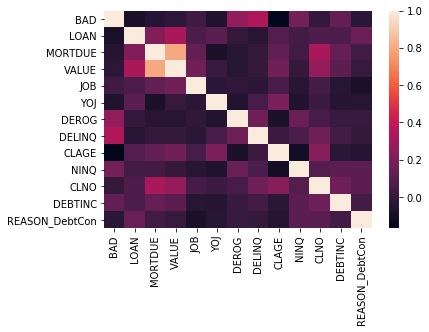

In [123]:
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

## Data after being preprocess 

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5725 entries, 0 to 5957
Data columns (total 13 columns):
BAD               5725 non-null int64
LOAN              5725 non-null int64
MORTDUE           5725 non-null float64
VALUE             5725 non-null float64
JOB               5725 non-null int64
YOJ               5725 non-null float64
DEROG             5725 non-null float64
DELINQ            5725 non-null float64
CLAGE             5725 non-null float64
NINQ              5725 non-null float64
CLNO              5725 non-null float64
DEBTINC           5725 non-null float64
REASON_DebtCon    5725 non-null uint8
dtypes: float64(9), int64(3), uint8(1)
memory usage: 587.0 KB


In [125]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon
count,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000
mean,0.184978,18720.943231,73210.006498,102109.880793,2.931703,8.910620,0.216594,0.390568,180.114809,1.172402,21.272664,33.909004,0.699389
std,0.388314,11272.533601,42649.148742,57599.866871,1.127006,7.286963,0.777638,1.041646,84.708197,1.668596,10.029580,7.624149,0.458564
min,0.000000,1100.000000,2063.000000,8000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11200.000000,48100.000000,66226.000000,2.000000,3.000000,0.000000,0.000000,116.632733,0.000000,15.000000,30.708487,0.000000
50%,0.000000,16400.000000,65021.000000,89634.000000,3.000000,8.000000,0.000000,0.000000,176.533333,1.000000,20.000000,33.909004,1.000000
75%,0.000000,23400.000000,88898.000000,119780.000000,4.000000,12.000000,0.000000,0.000000,229.474919,2.000000,26.000000,38.078963,1.000000
max,1.000000,89900.000000,399412.000000,855909.000000,6.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,65.000000,203.312149,1.000000


In [126]:
data.head(2)

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon
0,1,1100,25860.0,39025.0,3,10.5,0.0,0.0,94.366667,1.0,9.0,33.909004,0
1,1,1300,70053.0,68400.0,3,7.0,0.0,2.0,121.833333,0.0,14.0,33.909004,0


In [128]:
data.to_csv('hmeq_prepro.csv')

## What have been DONE:
### - Delete Invalid Data and extreme outliers
### - Handle Missing Value 
### - Create some visualisation to get insight
### - Change Categorical String Columns into Categorical Numerical Columns 

# THANK YOU for your time to read this!! :)